In [1]:
import pandas as pd

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
GoogleStock_data = pd.read_csv("GoogleStock Price Updated.csv")
GoogleStock_data.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
2531,2531,2023/01/23,97.949997,100.040001,97.500000,99.790001,99.790001,40005100
2532,2532,2023/01/24,98.099998,99.610001,97.199997,97.699997,97.699997,33078500
2533,2533,2023/01/25,95.570000,96.160004,93.760002,95.220001,95.220001,42330000
2534,2534,2023/01/26,96.500000,97.570000,95.379997,97.519997,97.519997,30114000
2535,2535,2023/01/27,97.309998,100.320000,97.309998,99.370003,99.370003,33850200


In [4]:
GoogleStock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2536 non-null   int64  
 1   Date        2536 non-null   object 
 2   Open        2536 non-null   float64
 3   High        2536 non-null   float64
 4   Low         2536 non-null   float64
 5   Close       2536 non-null   float64
 6   Adj Close   2536 non-null   float64
 7   Volume      2536 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 158.6+ KB


In [5]:
GoogleStock_data.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
count,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2536.000000,2.536000e+03
mean,1267.500000,59.746815,60.350351,59.126071,59.752340,59.752340,4.277325e+07
std,732.224465,34.629696,35.037901,34.204419,34.622387,34.622387,2.692419e+07
min,0.000000,17.634134,17.651152,17.405405,17.589338,17.589338,9.312000e+06
25%,633.750000,30.427364,30.636137,30.285035,30.470658,30.470658,2.686500e+07
50%,1267.500000,52.257750,52.703001,51.505501,52.189501,52.189501,3.436300e+07
75%,1901.250000,74.542501,75.379124,73.883247,74.422125,74.422125,4.887500e+07
max,2535.000000,151.250000,151.546494,148.899002,149.838501,149.838501,4.621933e+08


In [6]:
import plotly.express as px
from itertools import cycle

In [10]:
GoogleStock_data['Date'] = pd.to_datetime(GoogleStock_data['Date'], format='%Y-%m-%d')

y_overall = GoogleStock_data.loc[(GoogleStock_data['Date'] >= '2013-01-01')
                     & (GoogleStock_data['Date'] <= '2023-12-31')]

y_overall.drop(y_overall[['Close','Volume']],axis=1)

,Unnamed: 0,Date,Open,High,Low,Adj Close
0,0,2013-01-02,18.003504,18.193193,17.931683,18.099348
1,1,2013-01-03,18.141392,18.316566,18.036036,18.109859
2,2,2013-01-04,18.251753,18.555305,18.210211,18.467718
3,3,2013-01-07,18.404655,18.503002,18.282784,18.387136
4,4,2013-01-08,18.406906,18.425926,18.128880,18.350851
...,...,...,...,...,...,...
2531,2531,2023-01-23,97.949997,100.040001,97.500000,99.790001
2532,2532,2023-01-24,98.099998,99.610001,97.199997,97.699997
2533,2533,2023-01-25,95.570000,96.160004,93.760002,95.220001
2534,2534,2023-01-26,96.500000,97.570000,95.379997,97.519997


In [11]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,58.586604,58.655407
February,57.716835,57.685406
March,57.876032,57.851706
April,56.968596,56.859164
May,56.490067,56.594584
June,58.185813,58.175767
July,59.659926,59.815854
August,62.709944,62.723255
September,61.555860,61.470708


In [12]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Google Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [13]:
GStock_df = GoogleStock_data[['Date','Open','Close']]
GStock_df

,Date,Open,Close
0,2013-01-02,18.003504,18.099348
1,2013-01-03,18.141392,18.109859
2,2013-01-04,18.251753,18.467718
3,2013-01-07,18.404655,18.387136
4,2013-01-08,18.406906,18.350851
...,...,...,...
2531,2023-01-23,97.949997,99.790001
2532,2023-01-24,98.099998,97.699997
2533,2023-01-25,95.570000,95.220001
2534,2023-01-26,96.500000,97.519997


In [ ]:
GStock_df['Date']=pd.to_datetime(GStock_df['Date'].apply(lambda x: x.split("  ")[0]))

In [19]:
type(GoogleStock_data['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
GoogleStock_data['Date'][0]

Timestamp('2013-01-02 00:00:00')

In [21]:
type(GStock_df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
GStock_df['Date'][0]

Timestamp('2013-01-02 00:00:00')

In [23]:
GStock_df.set_index('Date',drop=True,inplace=True)

In [24]:
GStock_df

,Open,Close
Date,,
2013-01-02,18.003504,18.099348
2013-01-03,18.141392,18.109859
2013-01-04,18.251753,18.467718
2013-01-07,18.404655,18.387136
2013-01-08,18.406906,18.350851
...,...,...
2023-01-23,97.949997,99.790001
2023-01-24,98.099998,97.699997
2023-01-25,95.570000,95.220001


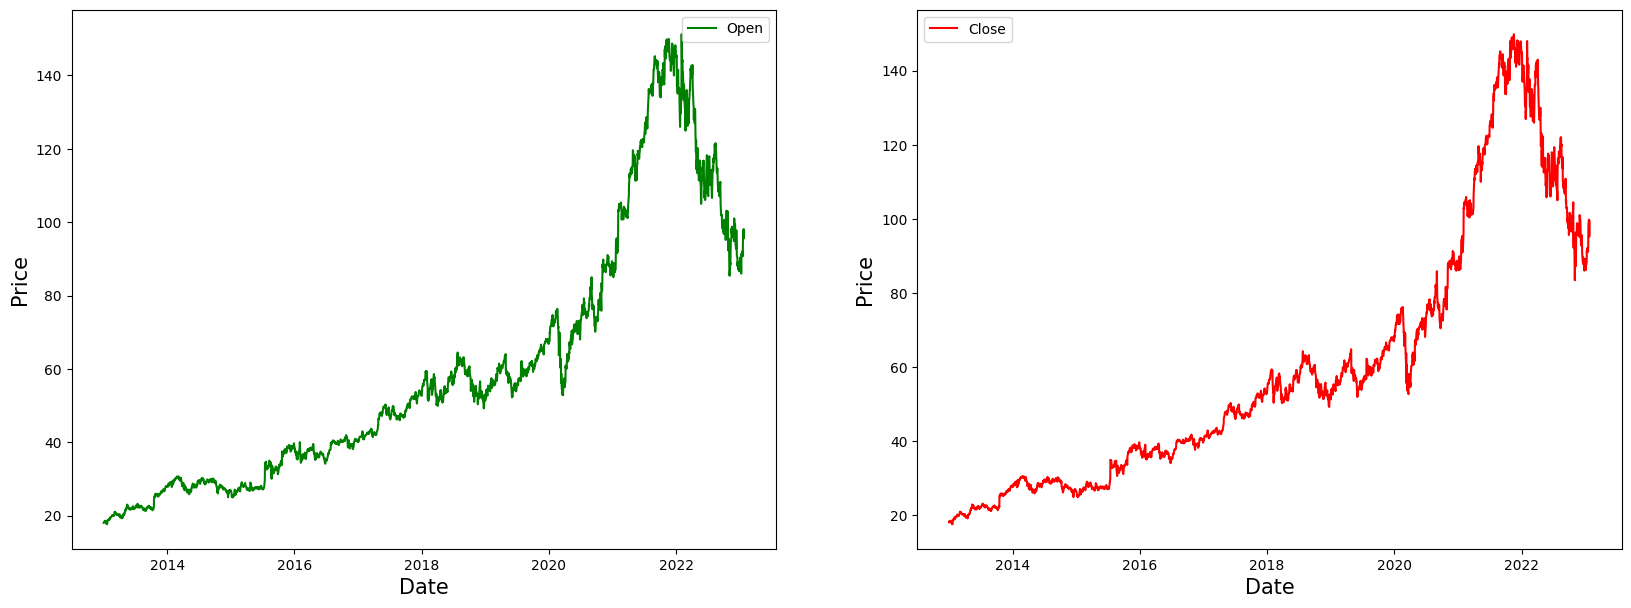

In [25]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(GStock_df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(GStock_df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
GStock_df[GStock_df.columns] = MMS.fit_transform(GStock_df)

In [27]:
GStock_df

,Open,Close
Date,,
2013-01-02,0.002764,0.003856
2013-01-03,0.003796,0.003936
2013-01-04,0.004622,0.006642
2013-01-07,0.005767,0.006033
2013-01-08,0.005784,0.005758
...,...,...
2023-01-23,0.601095,0.621559
2023-01-24,0.602218,0.605756
2023-01-25,0.583283,0.587003


In [28]:
GStock_df.shape

(2536, 2)

In [29]:
trainingdata_size = round(len(GStock_df) * 0.80)
trainingdata_size

2029

In [30]:
train_data = GStock_df[:trainingdata_size]
test_data = GStock_df[trainingdata_size:]
train_data.shape , test_data.shape

((2029, 2), (507, 2))

In [31]:
def create_sequence(dataset):
                sequences = []
                labels = []
                start_idx = 0
                for stop_idx in range(50,len(dataset)):
                    sequences.append(dataset.iloc[start_idx:stop_idx])
                    labels.append(dataset.iloc[stop_idx])
                    start_idx += 1
                return (np.array(sequences),np.array(labels))

In [32]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [33]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((1979, 50, 2), (1979, 2), (457, 50, 2), (457, 2))

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [35]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
62/62 [==============================] - 9s 58ms/step - loss: 0.0050 - mean_absolute_error: 0.0421 - val_loss: 0.0050 - val_mean_absolute_error: 0.0599
Epoch 2/80
62/62 [==============================] - 3s 42ms/step - loss: 2.4264e-04 - mean_absolute_error: 0.0106 - val_loss: 0.0032 - val_mean_absolute_error: 0.0476
Epoch 3/80
62/62 [==============================] - 3s 41ms/step - loss: 2.2381e-04 - mean_absolute_error: 0.0102 - val_loss: 0.0024 - val_mean_absolute_error: 0.0418
Epoch 4/80
62/62 [==============================] - 4s 61ms/step - loss: 2.2333e-04 - mean_absolute_error: 0.0100 - val_loss: 0.0041 - val_mean_absolute_error: 0.0539
Epoch 5/80
62/62 [==============================] - 3s 48ms/step - loss: 2.2224e-04 - mean_absolute_error: 0.0101 - val_loss: 0.0026 - val_mean_absolute_error: 0.0431
Epoch 6/80
62/62 [==============================] - 3s 46ms/step - loss: 2.2372e-04 - mean_absolute_error: 0.0103 - val_loss: 0.0022 - val_mean_absolute_error: 0.0395
Ep

In [37]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

15/15 [==============================] - 1s 12ms/step


array([[0.69518363, 0.7060277 ],
       [0.7005012 , 0.712087  ],
       [0.7078507 , 0.71942675],
       [0.7097465 , 0.7210638 ],
       [0.70610166, 0.71683484]], dtype=float32)

In [38]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[110.5217  , 110.96091 ],
       [111.23221 , 111.762245],
       [112.21422 , 112.732925],
       [112.46753 , 112.94942 ],
       [111.98052 , 112.390144]], dtype=float32)

In [39]:
Gs_slic_data = pd.concat([GStock_df.iloc[-457:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=GStock_df.iloc[-457:].index)], axis=1)

In [41]:
Gs_slic_data[['open','close']] = MMS.inverse_transform(Gs_slic_data[['Open','Close']])

In [42]:
Gs_slic_data['2021-06-09	':'2021-06-16']

,Open,Close,open_predicted,close_predicted,open,close
Date,,,,,,
2021-06-09,0.770398,0.777379,119.950935,120.219093,120.571503,120.397003
2021-06-10,0.768710,0.787658,120.128693,120.442139,120.346001,121.756500
2021-06-11,0.781089,0.785794,120.617241,120.949913,122.000000,121.510002
2021-06-14,0.778193,0.792868,121.191475,121.534317,121.612999,122.445503
2021-06-15,0.784457,0.785110,121.554390,121.909851,122.449997,121.419502
2021-06-16,0.777886,0.780218,121.389915,121.749214,121.571999,120.772499


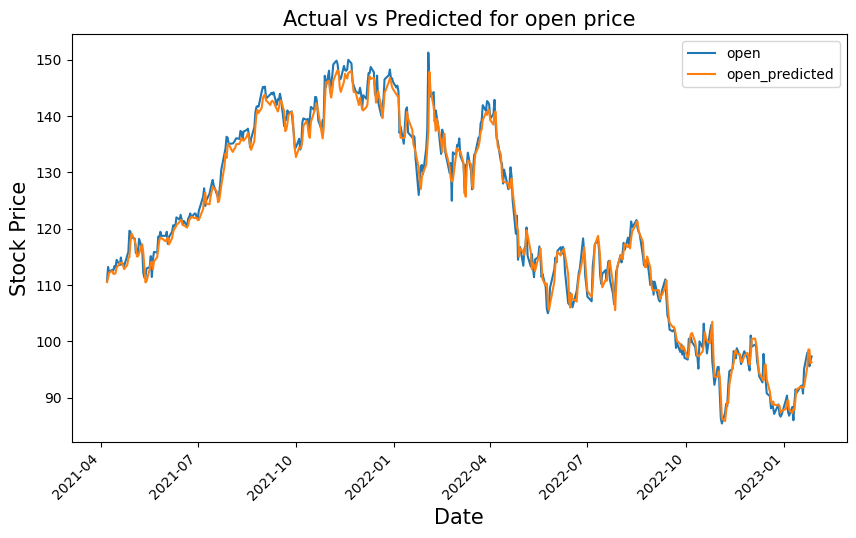

In [43]:
Gs_slic_data[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

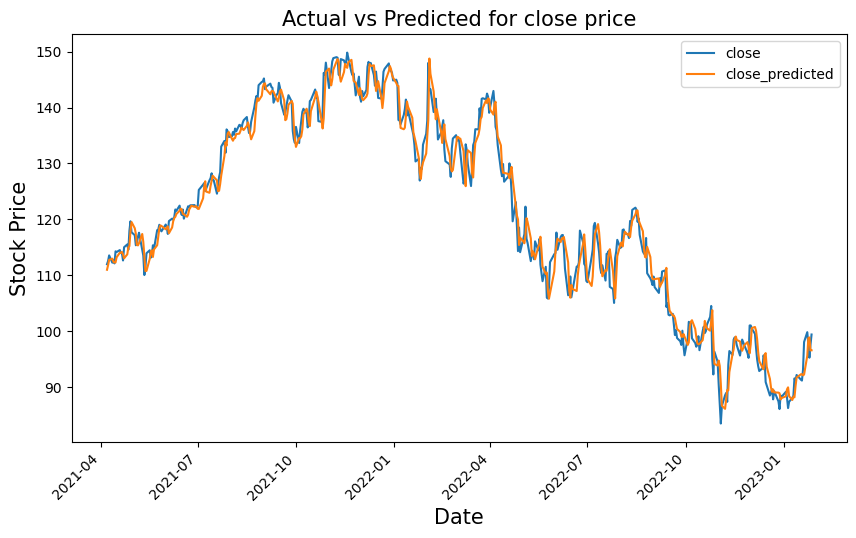

In [44]:
Gs_slic_data[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [45]:
Gs_slic_data = Gs_slic_data.append(pd.DataFrame(columns=Gs_slic_data.columns,index=pd.date_range(start=Gs_slic_data.index[-1], periods=11, freq='D', closed='right')))

In [46]:
Gs_slic_data['2021-06-09	':'2021-06-16']

,Open,Close,open_predicted,close_predicted,open,close
2021-06-09,0.770398,0.777379,119.950935,120.219093,120.571503,120.397003
2021-06-10,0.768710,0.787658,120.128693,120.442139,120.346001,121.756500
2021-06-11,0.781089,0.785794,120.617241,120.949913,122.000000,121.510002
2021-06-14,0.778193,0.792868,121.191475,121.534317,121.612999,122.445503
2021-06-15,0.784457,0.785110,121.554390,121.909851,122.449997,121.419502
2021-06-16,0.777886,0.780218,121.389915,121.749214,121.571999,120.772499


In [48]:
Upcoming_Prediction = pd.DataFrame(columns=['open','close'],index=Gs_slic_data.index)
Upcoming_Prediction.index=pd.to_datetime(Upcoming_Prediction.index)

In [49]:
Curr_Seq = test_seq[-1:]
for i in range(-10,0):
    Up_predict = model.predict(Curr_Seq)
    Upcoming_Prediction.iloc[i] = Up_predict
    Curr_Seq = np.append(Curr_Seq[0][1:],Up_predict,axis=0)
    Curr_Seq = Curr_Seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 22ms/step


In [50]:
Upcoming_Prediction[['open','close']] = MMS.inverse_transform(Upcoming_Prediction[['open','close']])

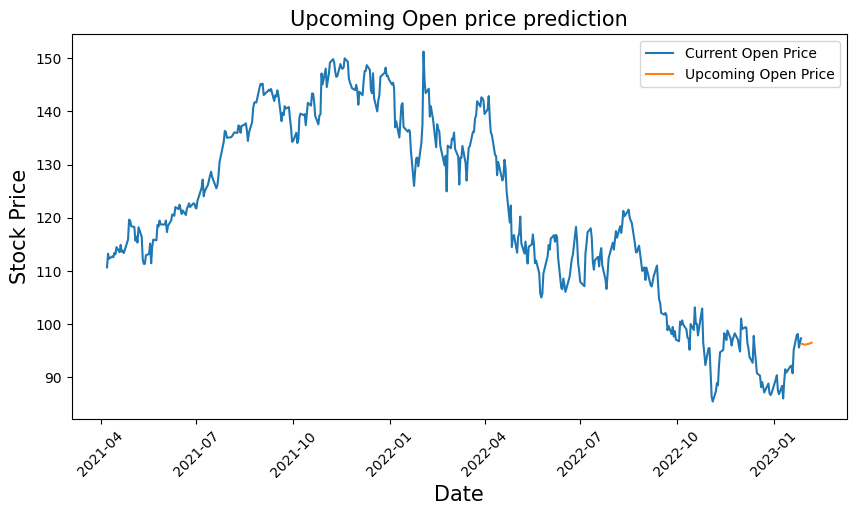

In [51]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(Gs_slic_data.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(Upcoming_Prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

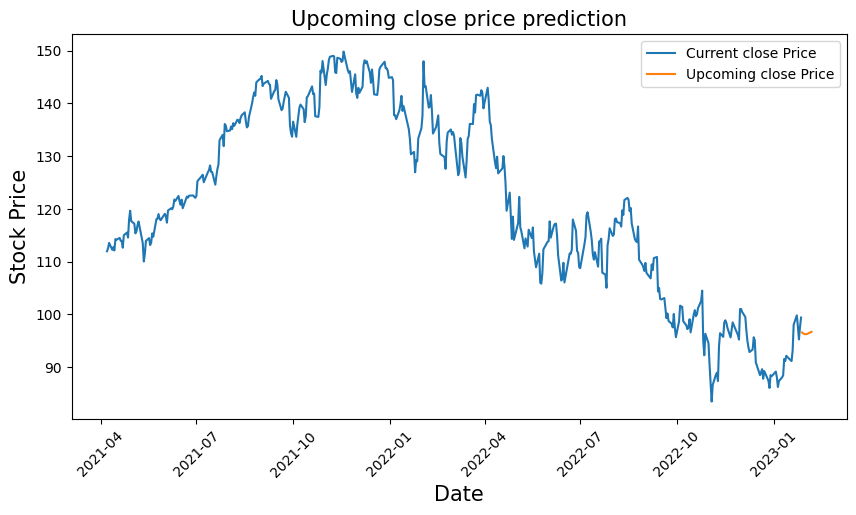

In [52]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(Gs_slic_data.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(Upcoming_Prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()